In [28]:
#Makine öğrenmesi dışında gerekli olan kütüphaneleri importluyoruz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
#Dosya okunuyor ve df'ye eşitleniyor.
df=pd.read_csv("/content/dubai_properties.csv")

In [30]:
#Info metodu ile kolonlar, veri tipleri ve girdi sayıları görülüyor.
df.info()
#Görüldüğü üzere en ve Boy kolonlarında eksi veriler mevcut.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

In [31]:
#Head ile ilk 5 satır yazdırılıyor.
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [32]:
#Shape ile kolon ve sıra sayısı gösteriliyor.
print(df.shape)

#Girdi sayısı çok fazla. İşlem yapması zor olacağından dolayı rastgele 1000 adet girdi seçiyoruz.
df = df.sample(n=1000, random_state=42)
df.reset_index(drop=True, inplace=True)
print(df.shape)

(73742, 17)
(1000, 17)


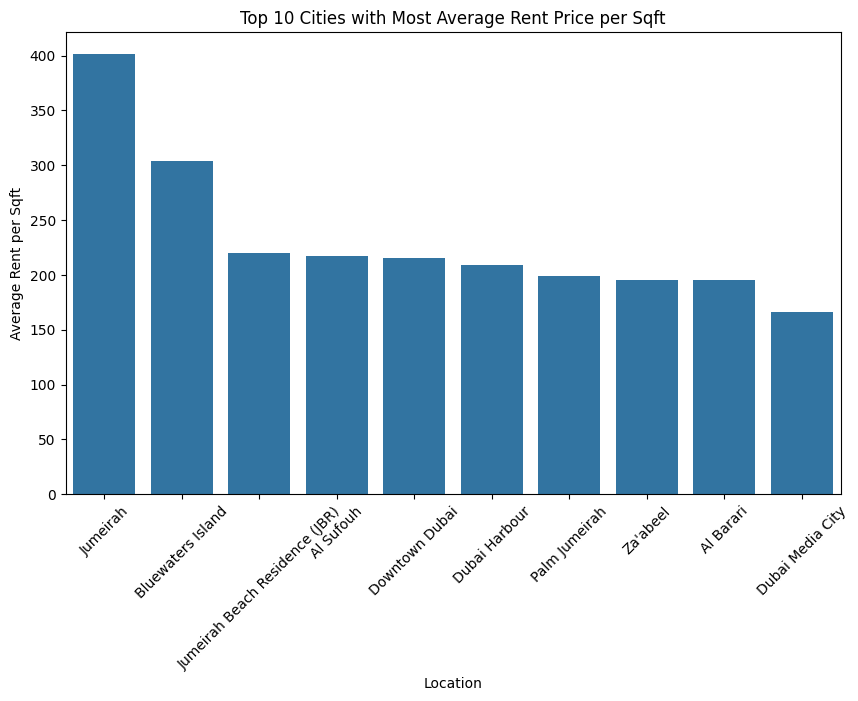

In [33]:
#Seaborn ve matplotlib kütüphaneleriyle lokasyona göre ortalama ev kiralarının sütun grafiği çıkarılıyor. Metrekareye göre ortalam kira fiyatı bizim hedef değişkenimiz.
avg_rent_per_sqft = df.groupby('Location')['Rent_per_sqft'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rent_per_sqft.index, y=avg_rent_per_sqft.values)
plt.xlabel('Location')
plt.ylabel('Average Rent per Sqft')
plt.title('Top 10 Cities with Most Average Rent Price per Sqft')
plt.xticks(rotation=45)

plt.show()
#Görüldüğü üzere Jumeirah metrekare başına en pahalı kiraya sahip.

Text(0.5, 1.0, 'Average Rent Prices For Furnished and Non-furnished Properties')

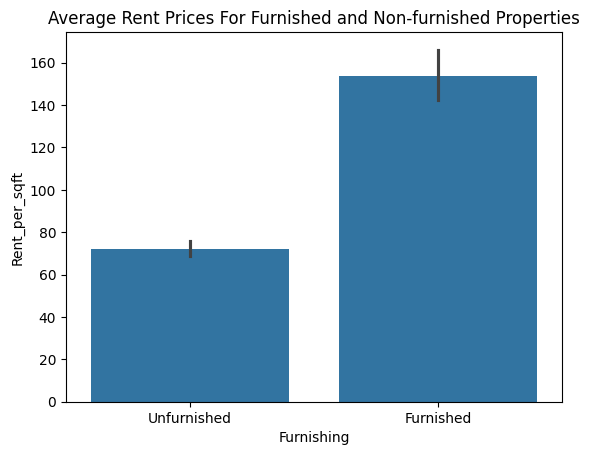

In [34]:
#Burada da evin mobilyalı olup olmamasına göre kira fiyatları gösteriliyor.
sns.barplot(x="Furnishing",y="Rent_per_sqft",data=df)
plt.title('Average Rent Prices For Furnished and Non-furnished Properties')

#Mobilyasız evlerin fiyatı ortalama olarak daha pahalı gözüküyor.

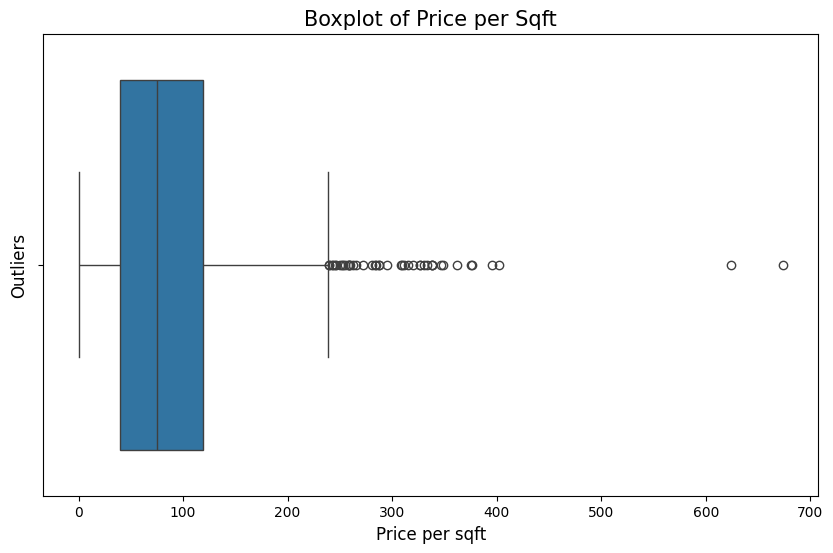

In [35]:
#Boxplot ile ev kiralarında outlier tespiti yapılıyor.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rent_per_sqft')
plt.xlabel('Price per sqft', fontsize=12)
plt.ylabel('Outliers', fontsize=12)
plt.title('Boxplot of Price per Sqft', fontsize=15)
plt.show()

#Görüldüğü üzere yüksek miktarda outlier var. Bu kaliteli veri analizi yapmayı zorlaştırıyor.

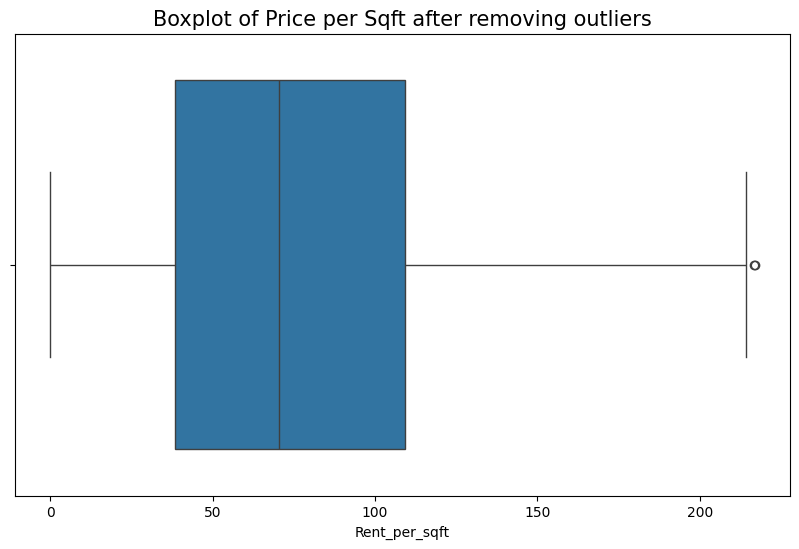

In [41]:
#Outlierlardan kurtulmak için upper ve lower bound yöntemi kullanılıyor.

# Calculate the Interquartile Range (IQR)
Q1 = df['Rent_per_sqft'].quantile(0.25)
Q3 = df['Rent_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[ (df['Rent_per_sqft'] >= lower_bound) & (df['Rent_per_sqft'] <= upper_bound) ]


#Tekrardan boxplot çıkarılıyor.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rent_per_sqft')
plt.title('Boxplot of Price per Sqft after removing outliers', fontsize=15)
plt.show()

#Görüldüğü üzere outlierlardan kurtulduk. Böylece daha sağlıklı bir değer tahmini yapılabilir.

In [37]:
#Scikitlearn kütüphanesinden LabelEncoder'ı importluyoruz.
from sklearn.preprocessing import LabelEncoder

cols = ['Address', 'Type', 'Rent_category', 'Frequency',
                     'Furnishing', 'Purpose', 'Posted_date', 'Location', 'City']

le = LabelEncoder()

df[cols] = df[cols].apply(lambda col: le.fit_transform(col))
#Label encoding sayısal olmayan değerler içeren kolonlar için uygulandı. Böylece sayısal işlemlerde parametre olarak kullanılabilirler.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

#Train test splitting datasete uygulanıyor. Böylece yöntemin doğruluğu test edilebilir.
X = df.drop('Rent_per_sqft', axis=1)
y = df[["Rent_per_sqft"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#Ölçekleme yapılarak veri setinde çalışma kolaykaltırılıyor.
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Eksik değerleri doldurma amaçlı diğer değerlerin ortalaması yazılıyor.
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

In [39]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score

#Cross validation ile hangi modelin ne kadar iyi olduğu kontrol ediliyor.
lin_reg_scores=cross_val_score(LinearRegression(),X_train_scaled,y_train,scoring='neg_mean_squared_error',cv=5)
lasso_reg_scores=cross_val_score(Lasso(),X_train_scaled,y_train,scoring='neg_mean_squared_error',cv=5)
ridge_reg_scores=cross_val_score(Ridge(),X_train_scaled,y_train,scoring='neg_mean_squared_error',cv=5)

print(f"CV score for Linear Regression: {-lin_reg_scores.mean()}")
print(f"CV score for Lasso Regression: {-lasso_reg_scores.mean()}")
print(f"CV score for Ridge Regression: {-ridge_reg_scores.mean()}")
print(f"The minimum CV score is: {min(-ridge_reg_scores.mean(),-lin_reg_scores.mean(),-lasso_reg_scores.mean())}")
#Ridge ression en iyi performansı verdiğinden onu kullanma kararı aldım.

CV score for Linear Regression: 1320.075825638443
CV score for Lasso Regression: 1321.1194361324074
CV score for Ridge Regression: 1317.5453740609978
The minimum CV score is: 1317.5453740609978


In [40]:
from sklearn.model_selection import GridSearchCV

#Grid search ile hiperparametre optimizasyonu yapılıyor.
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] ,
                "fit_intercept": [True, False],
                "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                "copy_X":[True, False]
                }


grid_search = GridSearchCV(Ridge(),params_Ridge, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_model = grid_search.best_estimator_


best_model_scores = cross_val_score(best_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
print("CV score for Best Ridge Regression:", -best_model_scores.mean())
#Optimizasyon ile minimal de olsa modelde performans artışı sağlandı.

Best Hyperparameters: {'alpha': 1, 'copy_X': False, 'fit_intercept': True, 'solver': 'saga'}
CV score for Best Ridge Regression: 1317.2268986186714
